In [8]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image
#from IPython.display import clear_output
import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [9]:
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
import community
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [10]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir



In [11]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir



In [12]:
class Loader:
    df = pd.DataFrame()
    
    #@abstractmethod
    def load_data(self, file_name):
        pass
    
    #@abstractmethod
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [13]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path(), low_memory=False)
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [14]:
def clean_data(df):
    df['Datetime_updated'] = pd.to_datetime(df['Datetime_updated'], infer_datetime_format=True)
    df['Datetime_updated_seconds'] = pd.to_datetime(df['Datetime_updated_seconds'], infer_datetime_format=True)
    return df

In [15]:
loader = CSVLoader(FilePathManager('Data_API.csv'))
loader.load_data(clean_data)
df = loader.get_df()

In [ ]:
pd.unique(df['Collection']).

In [82]:
mlb_champions_dataset = df[df['Collection'] == 'Mlb-champions']

In [102]:
list(get_addresses(mlb_champions_dataset))

['0x51e7a989c286c032df2f3b5cc94e392de8d7b178',
 '0xef191aeb45a0d6f393d4a592f94152836d5758f8',
 '0x3e68e86bd7b490fccbba279953dfa7c015f7a029',
 '0xe2592707a1d773ebfdf2f964a1b8a1fe7de67109',
 '0xb04d354eea5b3aa45e95143baa05073204f84dd3',
 '0x61c25329715966b79367a729518e796bd2025c29',
 '0xa767fa513bed7091304ebffefbf1cbeb752217f0',
 '0x00e365b4d1907a00b1b26621b64b56e2cdabef86',
 '0x08c084df7d2142703f0fcd48551469440b6351cb',
 '0x5f8b26e129b2498e508cf195f215299e4804bf86',
 '0xfbc9722e7639445f490340167b565bea492a920b',
 '0xac03bb73b6a9e108530aff4df5077c2b3d481e5a',
 '0x842cafef59a9d710b8787969ee197e1ff6dfb5ed',
 '0xdb5b7a9abf8cea05a18f2cd49bcd6f11b1bf1dbb',
 '0x3a850f26ff51c7110cbc1b71dd234765e3593a98',
 '0x4115bc69ce00abb9dd25f42c451bbcc978e06f62',
 '0x97cf5bf045ed10e38eff383d4cebcca6a6370985',
 '0x5590600e69114c28bbdc026750ad3e506154eaa1',
 '0x5f19b04f2c00fe526dbe22a3380bfe25231fa6eb',
 '0xcbc72bc1e8d0ecc6a43f9e94c5c1753a0be1ba23',
 '0x8a0637b5a2e1f0ec2f2a6836cbbf33dea9b89424',
 '0x691d7c4ca

In [279]:
def get_addresses(df):
    addresses = set()
    for address in df['Buyer_address']:
        addresses.add(address)
    for address in df['Seller_address']:
        addresses.add(address)
    return addresses

In [280]:
import networkx as nx
from networkx_viewer import Viewer

G = nx.from_pandas_edgelist(df=mlb_champions_dataset, source='Buyer_address', target='Seller_address', edge_attr='Unique_id_collection')
G.add_nodes_from(nodes_for_adding=list(get_addresses(mlb_champions_dataset)))

# Communities

In [295]:
communities = greedy_modularity_communities(G)

KeyboardInterrupt: 

In [293]:
communities

{'0x71494a98803ad0bc7b228a14da82f7197665a065': 0,
 '0x214e0807b739259e432c6d6842fb6c4bc8eae4da': 0,
 '0x702161763b21e21256c2ec8a79cb581ea39c0af3': 0,
 '0x7058cc88746c4d3d3c8df3e364717771ce90ece8': 0,
 '0xb5cdd02824a1f715cbfb0c26192f811ae3bf4d61': 0,
 '0xcfb586d08633fc36953be8083b63a7d96d50265b': 1,
 '0x79bd592415ff6c91cfe69a7f9cd091354fc65a18': 0,
 '0x1625ff3aa126dd7ca468ab9195519e26a9cee53c': 0,
 '0xf50077dc0a58d5d1cf12c0c900b1365ecaccff24': 0,
 '0xd42b6b02456612f1ecfdf0a01ba377fcd1640e70': 0,
 '0xc2b44e46aa04ad91e817fa285e2afd37195770d9': 2,
 '0x391c6d48e1d5a9b6ff3c8c0fb1a94d9b25483523': 0,
 '0xb7b2199af38d3390b0e4a352018e3939d332cfe9': 0,
 '0x5878c5c9132eb33217ffe17db87fccda0572d6de': 0,
 '0x6a91dfc4874b093bc657bf4cf7fe734b52b53eae': 0,
 '0x1e3cc365af596355f2d716e235e91de4ad09adf7': 0,
 '0xb872b333849c732ebe5a0165f4792939b2399392': 0,
 '0x3015c2464bb90b83d77359fcbb15a01c8b277320': 0,
 '0xa0d2df1f2c0e7e78df8df07d6ad47b4b9d23302a': 0,
 '0x680928af06645950238dffe32dc5a09d0895caba': 0,


In [291]:
modularity_dict = {} # Create a blank dictionary
for i, c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [292]:
modularity_dict

{'0': 101453,
 'x': 101453,
 '7': 101453,
 '1': 101453,
 '4': 101453,
 '9': 101453,
 'a': 101453,
 '8': 101453,
 '3': 101453,
 'd': 101452,
 'b': 101453,
 'c': 101453,
 '2': 101453,
 'f': 101453,
 '6': 101453,
 '5': 101453,
 'e': 101453}

In [281]:
deg_centrality = nx.degree_centrality(G)

In [282]:
deg_centrality

{'0x71494a98803ad0bc7b228a14da82f7197665a065': 0.0020403536613012923,
 '0x214e0807b739259e432c6d6842fb6c4bc8eae4da': 0.00012813815264211013,
 '0x702161763b21e21256c2ec8a79cb581ea39c0af3': 0.004169418351354814,
 '0x7058cc88746c4d3d3c8df3e364717771ce90ece8': 0.002010783318383882,
 '0xb5cdd02824a1f715cbfb0c26192f811ae3bf4d61': 0.0005026958295959705,
 '0xcfb586d08633fc36953be8083b63a7d96d50265b': 0.005421229534858506,
 '0x79bd592415ff6c91cfe69a7f9cd091354fc65a18': 0.007234877233792988,
 '0x1625ff3aa126dd7ca468ab9195519e26a9cee53c': 3.9427123889880045e-05,
 '0xf50077dc0a58d5d1cf12c0c900b1365ecaccff24': 0.00024641952431175027,
 '0xd42b6b02456612f1ecfdf0a01ba377fcd1640e70': 2.9570342917410034e-05,
 '0xc2b44e46aa04ad91e817fa285e2afd37195770d9': 0.0006899746680729008,
 '0x391c6d48e1d5a9b6ff3c8c0fb1a94d9b25483523': 0.0011729569357239312,
 '0xb7b2199af38d3390b0e4a352018e3939d332cfe9': 1.9713561944940022e-05,
 '0x5878c5c9132eb33217ffe17db87fccda0572d6de': 0.000995534878219471,
 '0x6a91dfc4874b093b

In [105]:
max_centrality = 0
max_address = None
for address, centrality in  deg_centrality.items():
    if centrality > max_centrality:
        max_centrality=centrality
        max_address=address

In [108]:
max_centrality

0.07706031364277055

In [109]:
max_address

'0xfc624f8f58db41bdb95aedee1de3c1cf047105f1'

In [79]:
close_centrality = nx.closeness_centrality(G)

In [80]:
close_centrality

{'0x2d008dee36dfff675c5288b83e5f24236122d668': 0.2897799399646526,
 '0xb26efeef1d5cfbccfbe535086e68883575a65079': 0.3044989210422223,
 '0xf796b8fb98c7c98fd4b5424ced013820d1f2ee76': 0.36172404825254567,
 '0x5cf6cb97e5738bce92ff64ea998a501b7841aed4': 0.2599381033287264,
 '0xedb7cf2aa0159569286d5874c6dd7fa8bea6b713': 0.28963410204821344,
 '0x283d5b78856224f096084fa91f1b4ea5138f0d57': 0.22126219176078438,
 '0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8': 0.2909519518553085,
 '0x83ac654be75487b9cfcc80117cdfb4a4c70b68a1': 0.3416461625228852,
 '0x685a6bdae46dcd719aa7667ec5e166eed658b885': 0.2968040024599279,
 '0xa6fe83dcf28cc982818656ba680e03416824d5e4': 0.403578513863815,
 '0xc674d5f701bbd8a79315cd2434af18c75816856e': 0.3520972534535333,
 '0x5e70d1f20b874f9a6d90289ea262494055d70c52': 0.31108268149718926,
 '0x4550d74cc0ac86f88aabed20a6c1a4b59dfab3c5': 0.3448190298201319,
 '0xed081ea02ca571e61309f163226abe4a4685684d': 0.2872487949936612,
 '0xf8856124ea157d6f26472e38224ee6744ad13af3': 0.3391296174

In [48]:
max_centrality = 0
max_address = None
for address, centrality in  close_centrality.items():
    if centrality > max_centrality:
        max_centrality=centrality
        max_address=address

In [64]:
max_centrality

0.1073279052553664

In [65]:
max_address

'0xa6fe83dcf28cc982818656ba680e03416824d5e4'

In [66]:
close_centrality = nx.b(G)

In [67]:

bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)

In [68]:
bet_centrality

{'0x2d008dee36dfff675c5288b83e5f24236122d668': 4.249645408019396e-05,
 '0xb26efeef1d5cfbccfbe535086e68883575a65079': 0.000933087040913537,
 '0xf796b8fb98c7c98fd4b5424ced013820d1f2ee76': 0.02898814801092237,
 '0x5cf6cb97e5738bce92ff64ea998a501b7841aed4': 0.0,
 '0xedb7cf2aa0159569286d5874c6dd7fa8bea6b713': 2.2473530476245873e-05,
 '0x283d5b78856224f096084fa91f1b4ea5138f0d57': 0.0,
 '0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8': 0.0028758416662067795,
 '0x83ac654be75487b9cfcc80117cdfb4a4c70b68a1': 0.018387252714844732,
 '0x685a6bdae46dcd719aa7667ec5e166eed658b885': 1.3794469617606703e-05,
 '0xa6fe83dcf28cc982818656ba680e03416824d5e4': 0.09791058397802244,
 '0xc674d5f701bbd8a79315cd2434af18c75816856e': 0.023030325011299695,
 '0x5e70d1f20b874f9a6d90289ea262494055d70c52': 0.0001850954824297295,
 '0x4550d74cc0ac86f88aabed20a6c1a4b59dfab3c5': 0.011214905130159419,
 '0xed081ea02ca571e61309f163226abe4a4685684d': 5.169295524301689e-06,
 '0xf8856124ea157d6f26472e38224ee6744ad13af3': 0.0058612817518

In [69]:
max_centrality = 0
max_address = None
for address, centrality in  bet_centrality.items():
    if centrality > max_centrality:
        max_centrality=centrality
        max_address=address

In [70]:
max_centrality

0.09791058397802244

In [71]:
max_address

'0xa6fe83dcf28cc982818656ba680e03416824d5e4'

In [58]:
bet_centrality

{'0x2d008dee36dfff675c5288b83e5f24236122d668': 4.249645408019396e-05,
 '0xb26efeef1d5cfbccfbe535086e68883575a65079': 0.000933087040913537,
 '0xf796b8fb98c7c98fd4b5424ced013820d1f2ee76': 0.02898814801092237,
 '0x5cf6cb97e5738bce92ff64ea998a501b7841aed4': 0.0,
 '0xedb7cf2aa0159569286d5874c6dd7fa8bea6b713': 2.2473530476245873e-05,
 '0x283d5b78856224f096084fa91f1b4ea5138f0d57': 0.0,
 '0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8': 0.0028758416662067795,
 '0x83ac654be75487b9cfcc80117cdfb4a4c70b68a1': 0.018387252714844732,
 '0x685a6bdae46dcd719aa7667ec5e166eed658b885': 1.3794469617606703e-05,
 '0xa6fe83dcf28cc982818656ba680e03416824d5e4': 0.09791058397802244,
 '0xc674d5f701bbd8a79315cd2434af18c75816856e': 0.023030325011299695,
 '0x5e70d1f20b874f9a6d90289ea262494055d70c52': 0.0001850954824297295,
 '0x4550d74cc0ac86f88aabed20a6c1a4b59dfab3c5': 0.011214905130159419,
 '0xed081ea02ca571e61309f163226abe4a4685684d': 5.169295524301689e-06,
 '0xf8856124ea157d6f26472e38224ee6744ad13af3': 0.0058612817518

In [ ]:
## Etheremon

In [39]:
mlb_champions_dataset = df[df['Collection'] == 'Etheremon']

In [91]:
mlb_champions_dataset = df[df['Collection'] == 'Cryptospacecommanders']

In [278]:
mlb_champions_dataset = df[df['Collection'] == 'Cryptokitties']

In [40]:
mlb_champions_dataset

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
4246340,0xbfde6246df72d3ca86419628cac46a9d2b60393c,346.0,0x058d864e40f5af6a9851eb9325aa7d6b1ef17cba3a94...,0xb26efeef1d5cfbccfbe535086e68883575a65079,subyashi,0x2d008dee36dfff675c5288b83e5f24236122d668,NaN,https://lh3.googleusercontent.com/S0C9axsHzTQH...,https://www.ethermon.io/assets/images/maps_squ...,https://lh3.googleusercontent.com/S0C9axsHzTQH...,...,Red Fort,NaN,Etheremon,OpenSea,2018-08-31,2018-08-31 08:24:54,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '346')",Etheremon,Games
4248091,0xbfde6246df72d3ca86419628cac46a9d2b60393c,6.0,0x25ec213f9437e931b29beaa2ddef966b6e6ebc642852...,0x5cf6cb97e5738bce92ff64ea998a501b7841aed4,NaN,0xf796b8fb98c7c98fd4b5424ced013820d1f2ee76,Sergey,https://lh3.googleusercontent.com/unA63MmsI7BY...,https://www.ethermon.io/assets/images/maps_squ...,https://lh3.googleusercontent.com/unA63MmsI7BY...,...,Senso-ji,NaN,Etheremon,OpenSea,2018-08-28,2018-08-28 18:10:41,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '6')",Etheremon,Games
4250995,0xbfde6246df72d3ca86419628cac46a9d2b60393c,473.0,0x258e551c2abbadd012c1800e027f48d9606dbf8fe834...,0xb26efeef1d5cfbccfbe535086e68883575a65079,subyashi,0xedb7cf2aa0159569286d5874c6dd7fa8bea6b713,0xedb7cf2aa0159569286d5874c6dd7fa8bea6b713,https://lh3.googleusercontent.com/349lNTBgs3kB...,https://www.ethermon.io/assets/images/maps_squ...,https://lh3.googleusercontent.com/349lNTBgs3kB...,...,Granada,NaN,Etheremon,OpenSea,2018-08-22,2018-08-22 15:44:18,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '473')",Etheremon,Games
4256913,0xbfde6246df72d3ca86419628cac46a9d2b60393c,523.0,0x370362c92c912167c009cd705bd03358a9b6c9cf9ac5...,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,fincho2,0x283d5b78856224f096084fa91f1b4ea5138f0d57,fnizo,https://lh3.googleusercontent.com/d24fyZAdldFE...,https://www.ethermon.io/assets/images/maps_squ...,https://lh3.googleusercontent.com/d24fyZAdldFE...,...,Main Square,NaN,Etheremon,OpenSea,2018-08-07,2018-08-07 23:11:58,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '523')",Etheremon,Games
4260707,0xbfde6246df72d3ca86419628cac46a9d2b60393c,8524.0,0x71f0878a4018a0630611e8b7de24edcdcd6400b30f06...,0x685a6bdae46dcd719aa7667ec5e166eed658b885,forestgate,0x83ac654be75487b9cfcc80117cdfb4a4c70b68a1,NaN,https://lh3.googleusercontent.com/al-I1-baZYHY...,https://www.ethermon.io/assets/images/items/20...,https://lh3.googleusercontent.com/al-I1-baZYHY...,...,Level Stone - 1,NaN,Etheremon,OpenSea,2018-09-29,2018-09-29 23:26:50,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '8524')",Etheremon,Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937245,0xbfde6246df72d3ca86419628cac46a9d2b60393c,28822.0,0xe366a37df46471935531136dc4c195d97a34da680281...,0x605da60745750705647dc028e91bb3608a28939f,neoexmnist,0x60a88751490a8b8c1dc58cc129d65614fe058a8b,Kahana82,https://lh3.googleusercontent.com/f65xLdTBgZ2b...,https://www.ethermon.io/assets/images/items/20...,https://lh3.googleusercontent.com/f65xLdTBgZ2b...,...,EXP Pill - 200,NaN,Etheremon,OpenSea,2021-03-01,2021-03-01 17:08:29,https://opensea.io/assets/0xbfde6246df72d3ca86...,"('Etheremon', '28822')",Etheremon,Games
5938010,0x5d00d312e171be5342067c09bae883f9bcb2003b,36762.0,0x4f22c621834c533769b2b54020d28d7e6dc48259729f...,0x7a759facfa62c35c40025a3445a357b1910fa1d2,Veryan,0x8214e4ab4fd9212b7e14d97cc0bba6b9f4c37feb,Dragonnn,https://lh3.googleusercontent.com/r9SglO1VP5bJ...,https://www.ethermon.io/assets/images/mons_ori...,https://lh3.googleusercontent.com/r9SglO1VP5bJ...,...,Ethermon #36762,NaN,Etheremon,OpenSea,2021-03-01,2021-03-01 14:24:58,https://opensea.io/assets/0x5d00d312e171be5342...,"('Etheremon', 

In [ ]:
#Etheromon

In [81]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.004655766712362966


In [ ]:
#Mlb Champs

In [90]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.010446586661420421


In [ ]:
#Cryptospacecommanders

In [99]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.010064238080856725


In [ ]:
#cryptokitties

In [110]:
density = nx.density(G)
print("Network density:", density)

Network density: 9.330122207950471e-05


### By collection Density

In [112]:
gb = df.groupby('Collection')    

In [113]:
gb

In [114]:
collection_dfs = [gb.get_group(x) for x in gb.groups]

In [117]:
collection_dfs

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
5684322,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xe4724c63ad6f38f1d9714c8988e1ebbf9bd42bf81c3f...,0x30cf6814b9e47bf07f4781cc8dfb62162e1e3eb6,FineGolem,0x73deaeb8aa241b6fcdb992060ae43193cccbf638,everythingsforsale,https://lh3.googleusercontent.com/mU9hWvzmv2Ex...,NaN,https://lh3.googleusercontent.com/mU9hWvzmv2Ex...,...,3DKong #50,NaN,3dkongz,OpenSea,2021-03-31,2021-03-31 18:17:10,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5684323,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xae894b63597d54ded35b9d815d4a496b65ba39c3c67a...,0x644c38c61499e5856d42c975c048e4dc298957f9,Cream,0x73deaeb8aa241b6fcdb992060ae43193cccbf638,everythingsforsale,https://lh3.googleusercontent.com/3_NI9Z3EFvl4...,NaN,https://lh3.googleusercontent.com/3_NI9Z3EFvl4...,...,3DKong #40,NaN,3dkongz,OpenSea,2021-03-31,2021-03-31 18:17:10,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5693114,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xdbe52171e228049be95e7e22f65dff8d92ff954cf2d9...,0x30cf6814b9e47bf07f4781cc8dfb62162e1e3eb6,FineGolem,0xa22c3464e9a11c0ea7812c297165ed5a7c0573e2,raultrade,https://lh3.googleusercontent.com/pY0JUcNaNevD...,NaN,https://lh3.googleusercontent.com/pY0JUcNaNevD...,...,3DKong #57,NaN,3dkongz,OpenSea,2021-03-30,2021-03-30 00:57:28,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5707414,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xc036063d515fcfa3a3aaaa465a4f233066ba96c72f9f...,0x30cf6814b9e47bf07f4781cc8dfb62162e1e3eb6,FineGolem,0x77403ae12d28356e5faceab790fa26f67a1f6f34,StunninSapphire,https://lh3.googleusercontent.com/kjzbOrwW2YN5...,NaN,https://lh3.googleusercontent.com/kjzbOrwW2YN5...,...,3DKong #51,NaN,3dkongz,OpenSea,2021-03-27,2021-03-27 23:22:46,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5712996,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xf3efc3e8d5e7e7d0a4948146ebf6ade8f83c5f0563a1...,0x30cf6814b9e47bf07f4781cc8dfb62162e1e3eb6,FineGolem,0x45563fc825014be99aeee156dcdfca936331e128,KAD,https://lh3.googleusercontent.com/hxXI_MgOM780...,NaN,https://lh3.googleusercontent.com/hxXI_MgOM780...,...,3DKong #44,NaN,3dkongz,OpenSea,2021-03-27,2021-03-27 03:25:05,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5713065,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xf441d7a29b7a343753e010cc03e8fc90610f86ed9f50...,0x45563fc825014be99aeee156dcdfca936331e128,KAD,0x80f6351787c8ed2aa155e0c3facd1bac25e98c80,rbisrxx85,https://lh3.googleusercontent.com/JfXo3KNPRc2b...,NaN,https://lh3.googleusercontent.com/JfXo3KNPRc2b...,...,3DKong #15,NaN,3dkongz,OpenSea,2021-03-27,2021-03-27 03:08:22,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5713082,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0x74c02e48f9d58a1689548845de68ea65014d4dd6aaf5...,0xbee71e5356d967a81aa009d7d74ae67719553bea,Kinggy,0x80f6351787c8ed2aa155e0c3facd1bac25e98c80,rbisrxx85,https://lh3.googleusercontent.com/z0_jOBpeabbt...,NaN,https://lh3.googleusercontent.com/z0_jOBpeabbt...,...,3DKong #23,NaN,3dkongz,OpenSea,2021-03-27,2021-03-27 03:04:34,https://opensea.io/assets/0x495f947276749ce646...,"('3dkongz', '220774724148016786412451199634467...",Dkongz,Other
5718890,0x495f947276749ce646f68ac8c248420045cb7b5e,2.207747e+76,0xf7b3a011f356fb74b5bf4463bea2723e8741ef33a6d7...,0x68cf1d6438209d1b818ecb096ddc978f05c5d41a,Makusan,0x73deaeb8aa

In [137]:
graphs = []

In [131]:
len(np.unique(df['Collection']))

6283

In [138]:
for df_collectin in collection_dfs:
    G = nx.from_pandas_edgelist(df=df_collectin, source='Buyer_address', target='Seller_address', edge_attr='Unique_id_collection')
    G.add_nodes_from(nodes_for_adding=list(get_addresses(df_collectin)))
    graphs.append(G)

In [171]:
densities = []
for idx,  g in enumerate(graphs):
     densities.append((idx, nx.density(g), nx.degree_centrality(g), nx)

In [174]:
len(densities)

6283

In [269]:
list_greater_point_5= list(filter(lambda density: density[1] > .1 ,densities ))

In [270]:
len(list_greater_point_5)

4658

In [274]:
my_max = 0
max_coll = None
for each in list_greater_point_5:
    a_len= len(collection_dfs[each[0]])
    if a_len > my_max:
        my_max = a_len
        max_coll = each
    if a_len > 50:
        print(each)
        print(len(collection_dfs[each[0]]))

(4, 0.12631578947368421)
113
(489, 1.0)
60
(821, 0.10052910052910052)
113
(868, 0.11594202898550725)
75
(963, 0.10526315789473684)
69
(1382, 0.10144927536231885)
115
(1428, 0.10476190476190476)
66
(2893, 0.11764705882352941)
54
(3089, 0.5)
96
(3114, 0.1067193675889328)
60
(3235, 0.10153846153846154)
85
(3465, 0.18181818181818182)
61
(3511, 0.14705882352941177)
56
(3541, 0.18181818181818182)
65
(3894, 0.24444444444444444)
86
(3921, 0.125)
62
(3973, 0.2222222222222222)
80
(3995, 0.3333333333333333)
60
(4032, 0.2)
51
(4089, 0.13970588235294118)
222
(4138, 0.10526315789473684)
63
(4200, 0.12418300653594772)
176
(4206, 0.11695906432748537)
80
(4397, 0.16483516483516483)
64
(4418, 0.13333333333333333)
64
(4430, 0.5)
59
(4463, 0.15384615384615385)
90
(4464, 0.15384615384615385)
56
(4489, 0.16666666666666666)
56
(4516, 0.1111111111111111)
88
(4586, 0.125)
189
(4622, 0.13333333333333333)
55
(4628, 0.20512820512820512)
932
(4633, 0.10269850514463211)
3237
(4813, 0.12857142857142856)
102
(4832, 0

In [259]:
my_max

932

In [260]:
max_coll

(4628, 0.20512820512820512)

In [1]:
collection_dfs[4628]

NameError: name 'collection_dfs' is not defined

In [276]:
collection_dfs[3894]

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
1341089,atomicassets,1.099515e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmdgVi1dXFHb4gn6AZBHCJyHdu2cpM7f62Vq7GZGZBJ9VX,https://ipfs.io/ipfs/QmdgVi1dXFHb4gn6AZBHCJyHd...,https://ipfs.atomichub.io/ipfs/QmdgVi1dXFHb4gn...,...,NaN,NaN,amasterpiece,Atomic,2021-01-28,2021-01-28 05:31:22,NaN,"('amasterpiece', '1099514664895')",Amasterpiece,Other
1352470,atomicassets,1.099515e+12,NaN,2grqy.wam,NaN,zdtqu.wam,NaN,QmQnfpMagaM1W1s11aK5cSiYzCCesQz1GedPat7bK4APR4,https://ipfs.io/ipfs/QmQnfpMagaM1W1s11aK5cSiYz...,https://ipfs.atomichub.io/ipfs/QmQnfpMagaM1W1s...,...,NaN,NaN,amasterpiece,Atomic,2021-01-26,2021-01-26 08:42:55,NaN,"('amasterpiece', '1099514587730')",Amasterpiece,Other
1352481,atomicassets,1.099515e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmdHzYyQ3BjqXPWBQP5Q3SitbbYnEmUQGWM4NVbvxLZBaR,https://ipfs.io/ipfs/QmdHzYyQ3BjqXPWBQP5Q3Sitb...,https://ipfs.atomichub.io/ipfs/QmdHzYyQ3BjqXPW...,...,NaN,NaN,amasterpiece,Atomic,2021-01-26,2021-01-26 08:36:43,NaN,"('amasterpiece', '1099514587900')",Amasterpiece,Other
1352521,atomicassets,1.099515e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmQnfpMagaM1W1s11aK5cSiYzCCesQz1GedPat7bK4APR4,https://ipfs.io/ipfs/QmQnfpMagaM1W1s11aK5cSiYz...,https://ipfs.atomichub.io/ipfs/QmQnfpMagaM1W1s...,...,NaN,NaN,amasterpiece,Atomic,2021-01-26,2021-01-26 08:22:11,NaN,"('amasterpiece', '1099514587735')",Amasterpiece,Other
1365227,atomicassets,1.099514e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmTfdt67n9bt76tQqhNChtBx1ffPA7oqkwdf46TGamwG3Q,https://ipfs.io/ipfs/QmTfdt67n9bt76tQqhNChtBx1...,https://ipfs.atomichub.io/ipfs/QmTfdt67n9bt76t...,...,NaN,NaN,amasterpiece,Atomic,2021-01-24,2021-01-24 01:19:51,NaN,"('amasterpiece', '1099514495479')",Amasterpiece,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438730,atomicassets,1.099514e+12,NaN,2grqy.wam,NaN,yqvb.earn,NaN,QmaA1oSNiPvQ14zvkE9p1RZch24Mwe4bwJeFJosRbiz2vs,https://ipfs.io/ipfs/QmaA1oSNiPvQ14zvkE9p1RZch...,https://ipfs.atomichub.io/ipfs/QmaA1oSNiPvQ14z...,...,NaN,NaN,amasterpiece,Atomic,2021-01-09,2021-01-09 10:00:40,NaN,"('amasterpiece', '1099513959090')",Amasterpiece,Other
1438731,atomicassets,1.099514e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmaA1oSNiPvQ14zvkE9p1RZch24Mwe4bwJeFJosRbiz2vs,https://ipfs.io/ipfs/QmaA1oSNiPvQ14zvkE9p1RZch...,https://ipfs.atomichub.io/ipfs/QmaA1oSNiPvQ14z...,...,NaN,NaN,amasterpiece,Atomic,2021-01-09,2021-01-09 10:00:30,NaN,"('amasterpiece', '1099513959089')",Amasterpiece,Other
1438733,atomicassets,1.099514e+12,NaN,2grqy.wam,NaN,yqvb.earn,NaN,QmaA1oSNiPvQ14zvkE9p1RZch24Mwe4bwJeFJosRbiz2vs,https://ipfs.io/ipfs/QmaA1oSNiPvQ14zvkE9p1RZch...,https://ipfs.atomichub.io/ipfs/QmaA1oSNiPvQ14z...,...,NaN,NaN,amasterpiece,Atomic,2021-01-09,2021-01-09 09:59:35,NaN,"('amasterpiece', '1099513959085')",Amasterpiece,Other
1794552,atomicassets,1.099515e+12,NaN,2grqy.wam,NaN,abtqu.wam,NaN,QmehUWcMXpctGp9qoweh9bqELUBWGM1hLWq5U5dT6TqSbc,https://ipfs.io/ipfs/QmehUWcMXpctGp9qoweh9bqEL...,https://ipfs.atomichub.io/ipfs/QmehUWcMXpctGp9...,...,NaN,NaN,amasterpiece,Atomic,2021-02-07,2021-02-07 13:39:45,NaN,"('amasterpiece', '1099515052639')",Amasterpiece,Other


In [249]:
collection_dfs[4628][['Datetime_updated_seconds','Price_USD']].sort_values(by=['Datetime_updated_seconds'])

,Datetime_updated_seconds,Price_USD
1444742,2021-01-07 16:09:00,3.850000
1444740,2021-01-07 16:09:14,0.385000
1444737,2021-01-07 16:09:22,0.385000
1444736,2021-01-07 16:09:31,0.385000
1444735,2021-01-07 16:09:40,0.192500
...,...,...
1439860,2021-01-08 22:25:21,0.220775
1439859,2021-01-08 22:25:31,0.220775
1439858,2021-01-08 22:25:43,0.220775
1439857,2021-01-08 22:26:02,0.220775


In [229]:
collection_dfs[4628]

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
1439853,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,tjiqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:30:09,NaN,"('dvburkeart11', '1099513949945')",Dvburkeart,Other
1439857,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:26:02,NaN,"('dvburkeart11', '1099513949930')",Dvburkeart,Other
1439858,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:43,NaN,"('dvburkeart11', '1099513949929')",Dvburkeart,Other
1439859,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:31,NaN,"('dvburkeart11', '1099513949928')",Dvburkeart,Other
1439860,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:21,NaN,"('dvburkeart11', '1099513949927')",Dvburkeart,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444735,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ilaaw.wam,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:40,NaN,"('dvburkeart11', '1099513920984')",Dvburkeart,Other
1444736,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ilaaw.wam,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:31,NaN,"('dvburkeart11', '1099513920983')",Dvburkeart,Other
1444737,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,mintonevault,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:22,NaN,"('dvburkeart11', '1099513920982')",Dvburkeart,Other
1444740,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,mintonevault,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:14,NaN,"('dvburkeart11', '1099513920981')",Dvburkeart,Other


In [297]:
collection_dfs[4628].sort_values(by=['Datetime_updated_seconds'])

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
1444742,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,mintonevault,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:00,NaN,"('dvburkeart11', '1099513920980')",Dvburkeart,Other
1444740,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,mintonevault,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:14,NaN,"('dvburkeart11', '1099513920981')",Dvburkeart,Other
1444737,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,mintonevault,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:22,NaN,"('dvburkeart11', '1099513920982')",Dvburkeart,Other
1444736,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ilaaw.wam,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:31,NaN,"('dvburkeart11', '1099513920983')",Dvburkeart,Other
1444735,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ilaaw.wam,NaN,QmcR1pSMeZ7wcxkVDLbzVfUrsuwKTZ3kdA723jmGpYqpxj,https://ipfs.io/ipfs/QmcR1pSMeZ7wcxkVDLbzVfUrs...,https://ipfs.atomichub.io/ipfs/QmcR1pSMeZ7wcxk...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-07,2021-01-07 16:09:40,NaN,"('dvburkeart11', '1099513920984')",Dvburkeart,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439860,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:21,NaN,"('dvburkeart11', '1099513949927')",Dvburkeart,Other
1439859,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:31,NaN,"('dvburkeart11', '1099513949928')",Dvburkeart,Other
1439858,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:25:43,NaN,"('dvburkeart11', '1099513949929')",Dvburkeart,Other
1439857,atomicassets,1.099514e+12,NaN,k.zqw.wam,NaN,ajgqu.wam,NaN,QmNr3d3NCdxEUHBT4WzF47Fxo9Yke7AeD82sXtj1XyeVEG,https://ipfs.io/ipfs/QmNr3d3NCdxEUHBT4WzF47Fxo...,https://ipfs.atomichub.io/ipfs/QmNr3d3NCdxEUHB...,...,NaN,NaN,dvburkeart11,Atomic,2021-01-08,2021-01-08 22:26:02,NaN,"('dvburkeart11', '1099513949930')",Dvburkeart,Other


In [306]:
len(np.unique(collection_dfs[4628]['Unique_id_collection']))

925

In [299]:
np.unique(collection_dfs[4628]['Datetime_updated'])

array(['2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

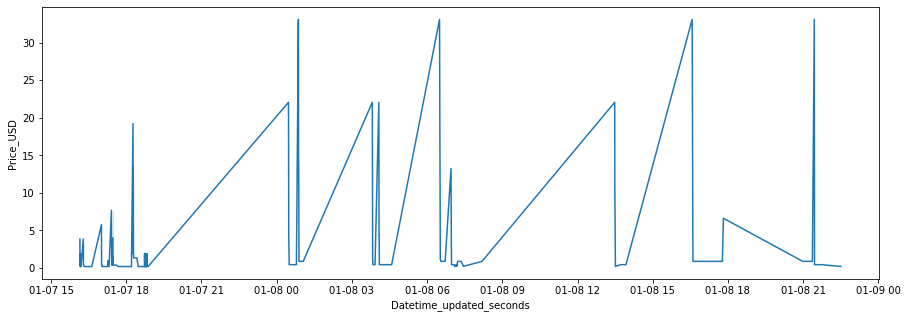

In [307]:
plt.figure(figsize=(15, 5))
p = sns.lineplot(data = collection_dfs[4628].sort_values(by=['Datetime_updated_seconds']), 
             x='Datetime_updated_seconds', y='Price_USD', markers=True)
#plt.xticks(rotation=90)
# plt.title(tokens.index[1])
plt.show()

In [309]:
nx.degree_centrality(graphs[4628])

{'tjiqu.wam': 0.3333333333333333,
 'k.zqw.wam': 1.0,
 'ajgqu.wam': 0.08333333333333333,
 'bacca': 0.08333333333333333,
 '3ngqu.wam': 0.16666666666666666,
 'hnzqu.wam': 0.08333333333333333,
 'x4iqw.wam': 0.08333333333333333,
 'zdtqu.wam': 0.08333333333333333,
 'p.aag.wam': 0.25,
 '212qw.wam': 0.08333333333333333,
 'fvfqu.wam': 0.08333333333333333,
 'ilaaw.wam': 0.25,
 'mintonevault': 0.08333333333333333}

In [70]:
import requests
import json

In [28]:
api_token = '37FATR9SYEQUDFHH2EC6IG5P998Q5D3KPF'
address = '0x76481caa104b5f6bccb540dae4cefaf1c398ebea'

In [142]:
address

'0x76481caa104b5f6bccb540dae4cefaf1c398ebea'

In [143]:
url= f'https://api.etherscan.io/api?module=contract&action=getabi&address={address}&apikey={api_token}'
r =requests.get(url)

In [144]:
r.status_code

200

In [145]:
ether_response = json.loads(r.text)

In [146]:
ether_response['status']

'1'

In [127]:
ether_response['status'] == '1' 

False

In [121]:
ether_response

{'status': '0', 'message': 'NOTOK', 'result': 'Invalid Address format'}

In [81]:
ether_response['result'][0]['SourceCode']

'pragma solidity 0.4.24;\npragma experimental ABIEncoderV2;\n\ncontract IERC20Token {\n\n    // solhint-disable no-simple-event-func-name\n    event Transfer(\n        address indexed _from,\n        address indexed _to,\n        uint256 _value\n    );\n\n    event Approval(\n        address indexed _owner,\n        address indexed _spender,\n        uint256 _value\n    );\n\n    /// @dev send `value` token to `to` from `msg.sender`\n    /// @param _to The address of the recipient\n    /// @param _value The amount of token to be transferred\n    /// @return True if transfer was successful\n    function transfer(address _to, uint256 _value)\n        external\n        returns (bool);\n\n    /// @dev send `value` token to `to` from `from` on the condition it is approved by `from`\n    /// @param _from The address of the sender\n    /// @param _to The address of the recipient\n    /// @param _value The amount of token to be transferred\n    /// @return True if transfer was successful\n    

In [ ]:
pd.merge(df, df, how='inner', lef_index=True)

In [25]:
import requests
from ratelimit import limits, RateLimitException, sleep_and_retry
import json

API_PERIOD = 1
API_CALLS = 1
address_source_code = {}

In [26]:
@sleep_and_retry
@limits(calls=API_CALLS, period=API_PERIOD)
def access_rate_limited_api(address, api_token, file):
    if address.endswith('.wam'):
        file.write(f'{address},{0}')
        file.write('\n')
    else:
        url = f'https://api.etherscan.io/api?module=contract&action=getabi&address={address}&apikey={api_token}'
        resp = requests.get(url)
        resp_dict = json.loads(resp.text)
        status = resp_dict['status']
        file.write(f'{address},{status}')
        file.write('\n')

In [26]:
#access_rate_limited_api('0xe1180d2c6bbeef3b60d8a3feda87a992a9cfd4e4',api_token, 'afile')

{"status":"0","message":"NOTOK","result":"Contract source code not verified"}
0xe1180d2c6bbeef3b60d8a3feda87a992a9cfd4e4,0


In [16]:
tokens_buyers = df['Buyer_address'].value_counts()
tokens_sellers = df['Seller_address'].value_counts()
all_addresses  = tokens_buyers.index.union(tokens_sellers.index)

In [172]:
tokens_buyers.get('0x76481caa104b5f6bccb540dae4cefaf1c398ebea')

130231

In [17]:
counts = []
for address in all_addresses:
    count = 0
    if tokens_buyers.get(address):
        count += tokens_buyers.get(address)
    if tokens_sellers.get(address):
        count += tokens_sellers.get(address)
    counts.append(count)

In [18]:
full_count = pd.DataFrame({
    'addresses': all_addresses,
    'counts': counts
})

In [19]:
addresses = full_count.sort_values(by=['counts'], ascending=False, ignore_index=True)['addresses']

In [16]:
an_address = 'cagr2.wam'
if an_address.endswith('.wam'):

True

In [15]:
addresses[addresses=='0xe1180d2c6bbeef3b60d8a3feda87a992a9cfd4e4']

149587    0xe1180d2c6bbeef3b60d8a3feda87a992a9cfd4e4
Name: addresses, dtype: object

In [48]:
buyer_address_value_count = df['Buyer_address'].value_counts()

In [160]:
seller_address_value_count = df['Seller_address'].value_counts()

In [ ]:
for buyer_address in buyer_address_value_count.index.tolist()
    

In [74]:
len(buyer_address_value_count.index.tolist())

358348

In [115]:
addresses = buyer_address_value_count.head(10).index.tolist()

In [214]:
addresses[addresses == 'brqaw.wam']

20841    brqaw.wam
Name: addresses, dtype: object

In [32]:
addresses[25032:]

25032     0x363e6c9ccae7c062ab9cdbe6da83657c458e72a8
25033     0xbb2abd5324e1dbcf5cd23612a32fc6ed76aa8645
25034                                      ewzqy.wam
25035                                          stash
25036     0xe3d3a7d6852c1210035fdc84da4b7c507a601945
                             ...                    
532940    0xbd1b4e2f374912f7896de3b9002853a478a2685a
532941    0xbd1b3df9b19df7628aaf552dcba626b170d88ab4
532942                                     llhbo.wam
532943                                     llhbw.wam
532944                                     ...bu.wam
Name: addresses, Length: 507913, dtype: object

In [202]:
adresses

0         0x76481caa104b5f6bccb540dae4cefaf1c398ebea
1         0x327305a797d92a39cee1a225d7e2a1cc42b1a8fa
2         0x4fabda075e15e9245ed7cfb5db398b4683bfcf54
3         0xfc624f8f58db41bdb95aedee1de3c1cf047105f1
4         0x0008d343091ef8bd3efa730f6aae5a26a285c7a2
                             ...                    
532940    0xbd1b4e2f374912f7896de3b9002853a478a2685a
532941    0xbd1b3df9b19df7628aaf552dcba626b170d88ab4
532942                                     llhbo.wam
532943                                     llhbw.wam
532944                                     ...bu.wam
Name: addresses, Length: 532945, dtype: object

In [29]:
with open('is_smart_contract.csv', 'a', buffering=50) as file:
    for address in addresses[250324:]:
        access_rate_limited_api(address, api_token, file)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)